**Linear Regression**

Link for the dataset: https://www.kaggle.com/datasets/kianindeed/imdb-movie-dataset-dec-2023

This dataset contains top IMDB movies updated till 15 Dec 2023. This file in the csv fromat and it contains 11 columns namely: Moive Name, Rating, Votes, Meta Score, Genre, PG Rating, Year, Duration, Cast, Director. The data has 1950 rows

**Cleaning and modifying data**

In [398]:
# install all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [399]:
# uploading dataset to juputer notebook
df = pd.read_csv("imdb_movie_data_2023.csv")

In [400]:
# read the data and see how I can modify this dataset
df.head()

# I have to google some names of columns to better understand what they mean
# Metascore is considered the rating of a film. Scores are assigned 
# to movie's reviews of large group of the world's most respected critics, 
# and weighted average are applied to summarize their opinions range.
# https://www.imdb.com/list/ls051211184/#:~:text=Metascore%20is%20considered%20the%20rating,to%20summarize%20their%20opinions%20range.

# PG rating means to what audience these movies
# if there is any restrictions for audience

,Unnamed: 0,Moive Name,Rating,Votes,Meta Score,Genre,PG Rating,Year,Duration,Cast,Director
0,0,Leave the World Behind,6.5,90000.0,67.0,"Drama, Mystery, Thriller",R,2023,2h 18m,"Julia Roberts, Mahershala Ali, Ethan Hawke, My...",Sam Esmail
1,1,Wonka,7.4,24000.0,66.0,"Adventure, Comedy, Family",PG,2023,1h 56m,"Timothée Chalamet, Gustave Die, Murray McArthu...",Paul King
2,2,Poor Things,8.5,6700.0,86.0,"Comedy, Drama, Romance",R,2023,2h 21m,"Emma Stone, Mark Ruffalo, Willem Dafoe, Ramy Y...",Yorgos Lanthimos
3,3,Killers of the Flower Moon,7.8,128000.0,89.0,"Crime, Drama, History",R,2023,3h 26m,"Leonardo DiCaprio, Robert De Niro, Lily Gladst...",Martin Scorsese
4,4,May December,7.0,21000.0,85.0,"Comedy, Drama",R,2023,1h 57m,"Natalie Portman, Chris Tenzis, Charles Melton,...",Todd Haynes


In [401]:
# check the format of columns
df.dtypes

# I need to check and if it is possible to modify the next columns:
# Genre, PG Rating, Duration

Unnamed: 0      int64
Moive Name     object
Rating        float64
Votes         float64
Meta Score    float64
Genre          object
PG Rating      object
Year            int64
Duration       object
Cast           object
Director       object
dtype: object

In [402]:
# I can drop columns Cast and Director
# because they containt a lot of data that cannot be modified to numeric
# the Moive Name is unnecessary for the Linear Regression
# that is why we also drop this column
df = df.drop(columns=['Cast', 'Director', 'Moive Name'])

In [403]:
# we drop all NaN values
df.dropna(inplace=True)

In [404]:
# Splitting strings in the Genres column
# based on a separator ","
# and creating one-hot encoding
genres = df['Genre'].str.get_dummies(sep=', ')

# Concatenate one-hot encoded genres with original DataFrame
df = pd.concat([df, genres], axis=1)

# Dropping the original 'Genre' column
df.drop('Genre', axis=1, inplace=True)

In [405]:
# check that we do not have any same names of columns
columns_list = df.columns.tolist()
sorted_columns = sorted(columns_list)
sorted_columns

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Duration',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Meta Score',
 'Music',
 'Musical',
 'Mystery',
 'PG Rating',
 'Rating',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'Unnamed: 0',
 'Votes',
 'War',
 'Western',
 'Year']

In [406]:
# checking that the conversion was correct
# by looking at genres and their marks in movies
df.T

,0,1,2,3,4,5,6,7,8,9,...,1939,1940,1941,1942,1943,1944,1945,1946,1947,1949
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,1939,1940,1941,1942,1943,1944,1945,1946,1947,1949
Rating,6.5,7.4,8.5,7.8,7.0,7.1,6.6,8.4,7.6,5.6,...,7.2,7.9,6.9,6.6,5.6,6.3,7.1,7.6,6.5,7.1
Votes,90000.0,24000.0,6700.0,128000.0,21000.0,56000.0,66000.0,553000.0,517000.0,13000.0,...,149000.0,81000.0,54000.0,215000.0,328000.0,22000.0,172000.0,198000.0,71000.0,203000.0
Meta Score,67.0,66.0,86.0,89.0,85.0,54.0,64.0,89.0,55.0,47.0,...,65.0,69.0,60.0,83.0,32.0,67.0,59.0,79.0,46.0,65.0
PG Rating,R,PG,R,R,R,PG-13,R,R,R,PG,...,R,PG-13,R,PG-13,PG-13,R,PG-13,R,PG,R
Year,2023,2023,2023,2023,2023,2023,2023,2023,2003,2023,...,2002,1965,2018,2009,2014,2021,2008,1986,1992,2017
Duration,2h 18m,1h 56m,2h 21m,3h 26m,1h 57m,2h 37m,2h 38m,3h,2h 15m,1h 57m,...,2h 18m,3h 17m,2h 39m,1h 39m,2h 45m,2h 21m,1h 52m,1h 36m,1h 44m,1h 55m
Action,0,0,0,0,0,1,1,0,0,0,...,1,0,1,0,1,0,0,0,0,1
Adventure,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Animation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [407]:
# verifing the current state of the DataFrame
df.head()

,Unnamed: 0,Rating,Votes,Meta Score,PG Rating,Year,Duration,Action,Adventure,Animation,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0,6.5,90000.0,67.0,R,2023,2h 18m,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,1,7.4,24000.0,66.0,PG,2023,1h 56m,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,8.5,6700.0,86.0,R,2023,2h 21m,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,7.8,128000.0,89.0,R,2023,3h 26m,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,7.0,21000.0,85.0,R,2023,1h 57m,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [408]:
# I can drop "Unnamed: 0"
# it was created becuse of contact of 2 df
df = df.drop(columns=['Unnamed: 0'])

In [409]:
df.head()

,Rating,Votes,Meta Score,PG Rating,Year,Duration,Action,Adventure,Animation,Biography,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,6.5,90000.0,67.0,R,2023,2h 18m,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,7.4,24000.0,66.0,PG,2023,1h 56m,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8.5,6700.0,86.0,R,2023,2h 21m,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,7.8,128000.0,89.0,R,2023,3h 26m,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7.0,21000.0,85.0,R,2023,1h 57m,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [410]:
# this makes multiple columns with the variable PG Rating
from sklearn.preprocessing import OneHotEncoder
variables = ['PG Rating']

# I use encoder in order to make columns with only numeric data
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_encoded = encoder.fit_transform(df[variables]).astype(int)
df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables)

In [411]:
# verifing the current state of the DataFrame
df

,Rating,Votes,Meta Score,Year,Duration,Action,Adventure,Animation,Biography,Comedy,...,PG Rating_PG-13,PG Rating_Passed,PG Rating_R,PG Rating_TV-14,PG Rating_TV-G,PG Rating_TV-MA,PG Rating_TV-PG,PG Rating_TV-Y7,PG Rating_Unrated,PG Rating_X
0,6.5,90000.0,67.0,2023,2h 18m,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,7.4,24000.0,66.0,2023,1h 56m,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,8.5,6700.0,86.0,2023,2h 21m,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,7.8,128000.0,89.0,2023,3h 26m,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,7.0,21000.0,85.0,2023,1h 57m,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944,6.3,22000.0,67.0,2021,2h 21m,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1945,7.1,172000.0,59.0,2008,1h 52m,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1946,7.6,198000.0,79.0,1986,1h 36m,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1947,6.5,71000.0,46.0,1992,1h 44m,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [412]:
# we can drop PG Rating_Unrated for the same reason
# and also we can delete the last column: PG Rating_X
# becuase we used OneHotEncoder
df = df.drop(columns=['PG Rating_Unrated', 'PG Rating_X'])

In [413]:
# we can start to modify the last column Duration
# we need to remove "h" and "m" and modify the data it into minutes
# we can make a function that convert a string column
# into the numeric one
def convert_to_minutes(duration_str):
    try:
        # if the value is already an integer, return it as is
        if isinstance(duration_str, int):
            return duration_str

        # split the string into parts based on 'h' and 'm'
        parts = duration_str.split()

        # initialize hours and minutes
        hours, minutes = 0, 0

        # check each part and update hours or minutes accordingly
        for part in parts:
            if 'h' in part:
                hours = int(part.replace('h', ''))
            elif 'm' in part:
                minutes = int(part.replace('m', ''))

        # calculate total minutes
        total_minutes = hours * 60 + minutes
        return total_minutes
    except Exception as e:
        print(f"Error processing {duration_str}: {e}")
        return pd.NA

# appling the conversion function to the 'Duration' column
df['Duration'] = df['Duration'].apply(convert_to_minutes)

In [414]:
# checking the dataset that we finally have
df.head()

# we can that all data that we have now is numeric
# and now we can proceed with checking the balance of the data

,Rating,Votes,Meta Score,Year,Duration,Action,Adventure,Animation,Biography,Comedy,...,PG Rating_NC-17,PG Rating_PG,PG Rating_PG-13,PG Rating_Passed,PG Rating_R,PG Rating_TV-14,PG Rating_TV-G,PG Rating_TV-MA,PG Rating_TV-PG,PG Rating_TV-Y7
0,6.5,90000.0,67.0,2023,138,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,7.4,24000.0,66.0,2023,116,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,8.5,6700.0,86.0,2023,141,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,7.8,128000.0,89.0,2023,206,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,7.0,21000.0,85.0,2023,117,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [415]:

df.T

,0,1,2,3,4,5,6,7,8,9,...,1939,1940,1941,1942,1943,1944,1945,1946,1947,1949
Rating,6.5,7.4,8.5,7.8,7.0,7.1,6.6,8.4,7.6,5.6,...,7.2,7.9,6.9,6.6,5.6,6.3,7.1,7.6,6.5,7.1
Votes,90000.0,24000.0,6700.0,128000.0,21000.0,56000.0,66000.0,553000.0,517000.0,13000.0,...,149000.0,81000.0,54000.0,215000.0,328000.0,22000.0,172000.0,198000.0,71000.0,203000.0
Meta Score,67.0,66.0,86.0,89.0,85.0,54.0,64.0,89.0,55.0,47.0,...,65.0,69.0,60.0,83.0,32.0,67.0,59.0,79.0,46.0,65.0
Year,2023.0,2023.0,2023.0,2023.0,2023.0,2023.0,2023.0,2023.0,2003.0,2023.0,...,2002.0,1965.0,2018.0,2009.0,2014.0,2021.0,2008.0,1986.0,1992.0,2017.0
Duration,138.0,116.0,141.0,206.0,117.0,157.0,158.0,180.0,135.0,117.0,...,138.0,197.0,159.0,99.0,165.0,141.0,112.0,96.0,104.0,115.0
Action,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
Adventure,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Animation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Biography,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Comedy,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


**Checking the balance of the data**

In [416]:
df.describe()

# I need to balance these 5 columns Rating, Votes, Meta Score, Year, Duration

,Rating,Votes,Meta Score,Year,Duration,Action,Adventure,Animation,Biography,Comedy,...,PG Rating_NC-17,PG Rating_PG,PG Rating_PG-13,PG Rating_Passed,PG Rating_R,PG Rating_TV-14,PG Rating_TV-G,PG Rating_TV-MA,PG Rating_TV-PG,PG Rating_TV-Y7
count,1784.000000,1.784000e+03,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,...,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000,1784.000000
mean,6.952691,2.925449e+05,62.142377,2006.497758,117.170404,0.331278,0.288117,0.052691,0.059417,0.341368,...,0.003924,0.148543,0.338004,0.005045,0.453475,0.002242,0.000561,0.007848,0.002803,0.001121
std,0.862546,3.184306e+05,16.569672,15.241521,21.743498,0.470805,0.453013,0.223478,0.236470,0.474301,...,0.062534,0.355737,0.473163,0.070868,0.497970,0.047312,0.023676,0.088263,0.052881,0.033473
min,2.400000,1.070000e+02,14.000000,1938.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.400000,9.000000e+04,50.000000,1998.000000,102.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,2.000000e+05,63.000000,2010.000000,114.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.600000,3.772500e+05,74.000000,2019.000000,129.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.300000,2.800000e+06,100.000000,2023.000000,246.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


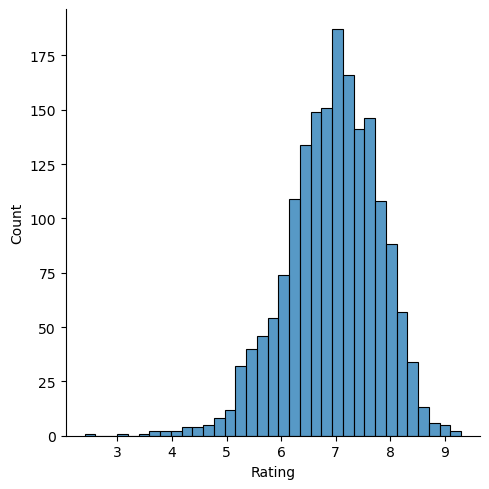

In [417]:
# let's see the Rating distribution
sns.displot(df, x="Rating")

# we can notice that that the distribution is to more right side
# it would be good to cut it until 5 on the x-axis
# in order to make more balanced

In [418]:
# filter out top 8%  (1 - 0.08 = 0.92) based on price to reduce amount of buildings
df = df.query("Rating > Rating.quantile(0.1) and Rating < Rating.quantile(0.95)")

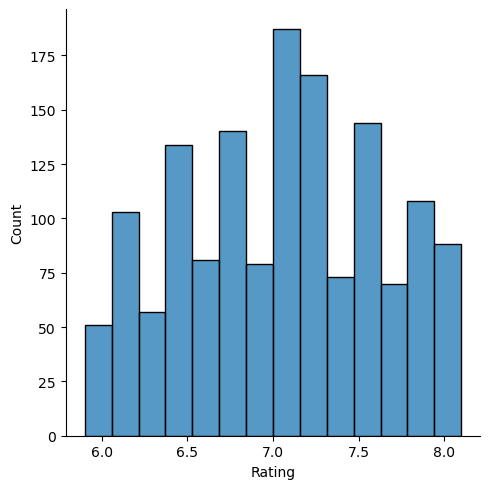

In [419]:
# now data is more balanced
sns.displot(df, x="Rating")

In [420]:
# I checked that I lost about 17% of data because of this outliner removing
df.describe()

,Rating,Votes,Meta Score,Year,Duration,Action,Adventure,Animation,Biography,Comedy,...,PG Rating_NC-17,PG Rating_PG,PG Rating_PG-13,PG Rating_Passed,PG Rating_R,PG Rating_TV-14,PG Rating_TV-G,PG Rating_TV-MA,PG Rating_TV-PG,PG Rating_TV-Y7
count,1481.000000,1.481000e+03,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,...,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,1481.0,1481.000000,1481.000000,1481.000000
mean,7.042944,2.616044e+05,63.340986,2006.744767,116.907495,0.330858,0.287643,0.055368,0.063471,0.345037,...,0.003376,0.146523,0.342336,0.004727,0.461175,0.002026,0.0,0.007427,0.001350,0.001350
std,0.578400,2.185316e+05,14.548957,14.542657,20.550997,0.470681,0.452817,0.228774,0.243890,0.475541,...,0.058026,0.353749,0.474652,0.068610,0.498659,0.044977,0.0,0.085891,0.036736,0.036736
min,5.900000,1.410000e+02,16.000000,1938.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,6.600000,9.900000e+04,52.000000,1999.000000,102.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,7.100000,2.060000e+05,64.000000,2010.000000,115.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,7.500000,3.670000e+05,74.000000,2018.000000,128.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,8.100000,1.400000e+06,99.000000,2023.000000,246.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


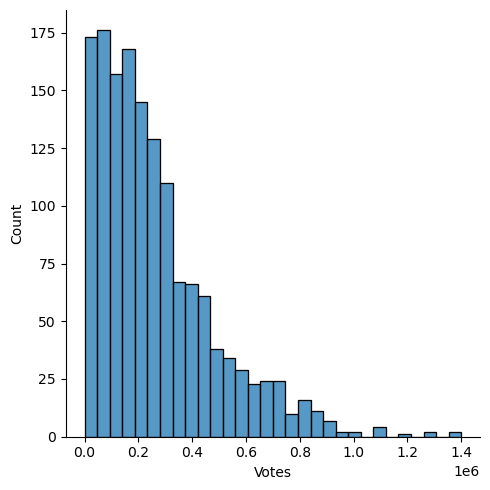

In [421]:
sns.displot(df, x="Votes")
# we can see that the column "Votes" is disbalanced

In [422]:
# let's remove everything that is up than 0.85
df = df.query("Votes < Votes.quantile(0.85)")

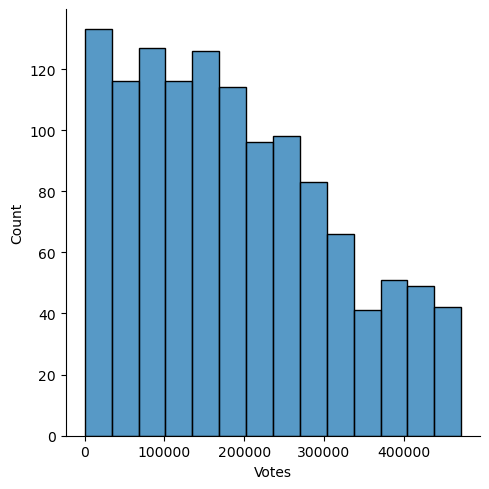

In [423]:
# let's check the data plot
sns.displot(df, x="Votes")

# the daya still in not balanced but 
# we already we removed 15% of data

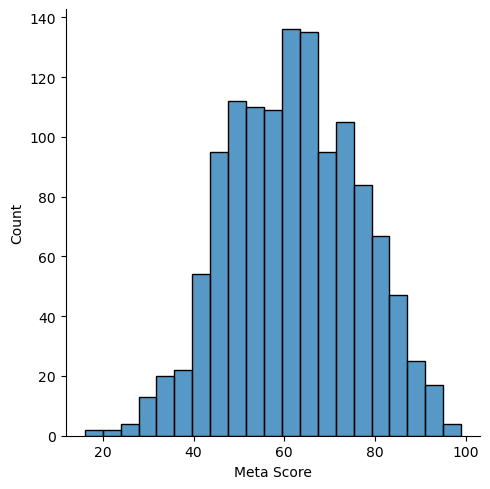

In [424]:
# We still need to carry out of Meta Score, Year, Duration
sns.displot(df, x="Meta Score")

# Meta Score looks pretty well
# I will remove a little bit from bottom

In [425]:
# calculate the cutoff value for the bottom 3%
cutoff_value = df['Meta Score'].quantile(0.03)

# filter out rows where the 'Meta Score' values are below the cutoff
df = df[df['Meta Score'] >= cutoff_value]

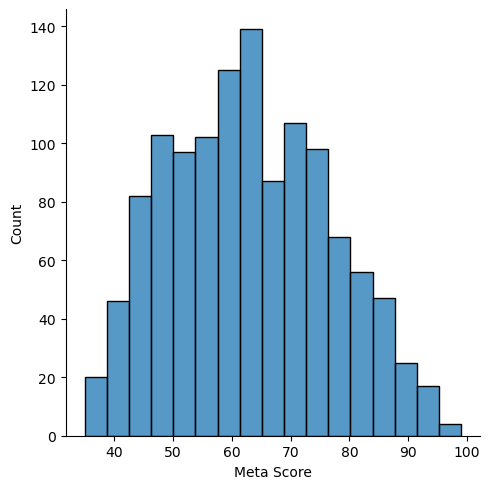

In [426]:
# let's check the plot
sns.displot(df, x="Meta Score")

# it looks pretty balanced

In [427]:
# we can see that there are many outliers in the old movies
class_counts = df['Year'].value_counts()
class_counts

2023    125
2022     79
2019     55
2021     54
2016     42
       ... 
1938      1
1966      1
1942      1
1944      1
1963      1
Name: Year, Length: 73, dtype: int64

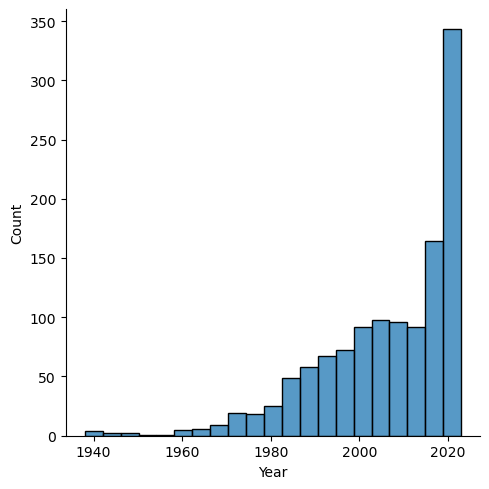

In [428]:
# and also there is a huge number of recent movies
sns.displot(df, x="Year")

In [429]:
df = df.query('Year >= Year.quantile(q=0.02) and Year < Year.quantile(q=0.05)')

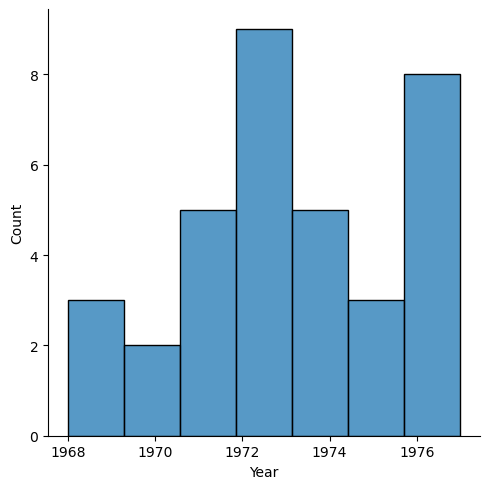

In [430]:
sns.displot(df, x="Year")

In [431]:
#to be continued...